# **Кейс №1. Рекламщики. Алексеев Виталий**

## **0 Импорт библиотек**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = 'white'

## **1 Загрузка данных**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/zalig/cu-datasets/main/advertisment.csv")
df.fillna(0, inplace=True)

df["A"] = pd.Categorical(df["A"].astype(int))
df["B"] = pd.Categorical(df["B"].astype(int))
df["Purchased"] = pd.Categorical(df["Purchased"].astype(int))
df["Gender"] = pd.Categorical(df["Gender"])

display(df.head())
df.info()

,BirthdayYear,Age,Gender,ClientSince,A,B,Purchased
0,2003,21,Male,2023,0,0,0
1,2001,23,Female,2024,0,0,0
2,2002,22,Male,2024,0,0,0
3,2004,20,Male,2023,0,1,1
4,2003,21,Female,2024,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   BirthdayYear  20000 non-null  int64   
 1   Age           20000 non-null  int64   
 2   Gender        20000 non-null  category
 3   ClientSince   20000 non-null  int64   
 4   A             20000 non-null  category
 5   B             20000 non-null  category
 6   Purchased     20000 non-null  category
dtypes: category(4), int64(3)
memory usage: 547.5 KB


## **2 Анализ текущей ситуации**

In [3]:
total_amount = df.shape[0]
a_amount = df[df["A"] == 1].shape[0]
b_amount = df[df["B"] == 1].shape[0]

print(f"Общее количество клиентов: {total_amount}")
print(f"Количество клиентов в группе A: {a_amount}")
print(f"Количество клиентов в группе B: {b_amount}")

Общее количество клиентов: 20000
Количество клиентов в группе A: 300
Количество клиентов в группе B: 500


In [4]:
a_bought = df[(df["Purchased"] == 1) & (df["A"] == 1)].shape[0]
a_conversion = a_bought / a_amount

b_bought = df[(df["Purchased"] == 1) & (df["B"] == 1)].shape[0]
b_conversion = b_bought / b_amount

bought_total = df[df["Purchased"] == 1].shape[0]
total_conversion = bought_total / total_amount

print(f"Общее количество, конверсия покупателей (новая услуга): {bought_total}, {total_conversion * 100:.2f}%")
print(f"Количество покупателей, конверсия в группе A: {a_bought}, {a_conversion * 100:.2f}%")
print(f"Количество покупателей, конверсия в группе B: {b_bought}, {b_conversion * 100:.2f}%")

Общее количество, конверсия покупателей (новая услуга): 1327, 6.64%
Количество покупателей, конверсия в группе A: 33, 11.00%
Количество покупателей, конверсия в группе B: 66, 13.20%


## **3 Исследование возможных сценариев**

In [5]:
control_amount = df[(df["A"] == 0) & (df["B"] == 0)].shape[0]
control_bought = df[(df["Purchased"] == 1) & (df["A"] == 0) & (df["B"] == 0)].shape[0]
control_conversion = control_bought / control_amount

print(f"Количество клиентов в контрольной группе: {control_amount}")
print(f"Естественная конверсия: {control_conversion * 100:.2f}%")

Количество клиентов в контрольной группе: 19200
Естественная конверсия: 6.40%


Сценарий 1: сохранение конверсии из группы A для всех клиентов

In [6]:
print(
    f"Дополнительное количество покупателей из контрольной группы: {(a_conversion - control_conversion) * control_amount:.0f}")

Дополнительное количество покупателей из контрольной группы: 884


Сценарий 2: сохранение конверсии из группы B для всех клиентов

In [7]:
print(
    f"Дополнительное количество покупателей из контрольной группы: {(b_conversion - control_conversion) * control_amount:.0f}")

Дополнительное количество покупателей из контрольной группы: 1306


## **4 Исследование клиентской базы**

### **4.1 Распределение полов**

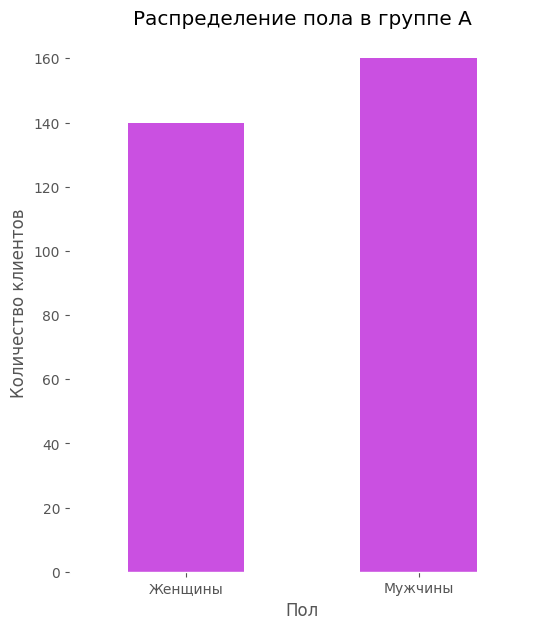

In [8]:
df.loc[df["A"] == 1, "Gender"].value_counts()[::-1].plot(
    kind="bar",
    grid=False,
    title="Распределение пола в группе A",
    figsize=(6, 7),
    xlabel="Пол",
    ylabel="Количество клиентов",
    color="#CA50E1"
)
plt.xticks([0, 1], ["Женщины", "Мужчины"], rotation=0)
plt.show()

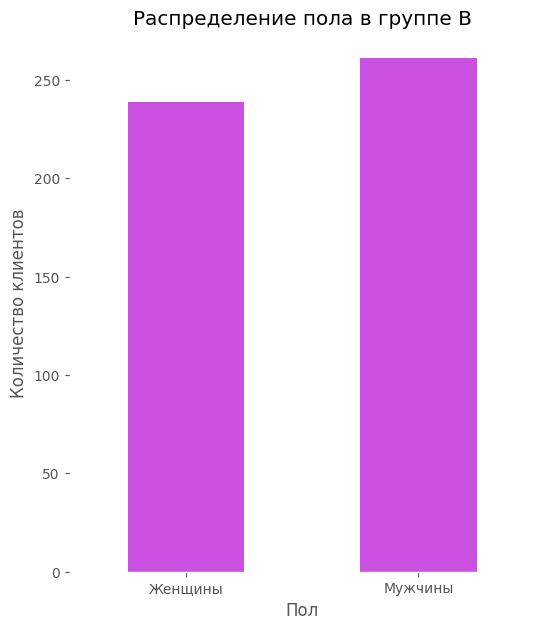

In [9]:
df.loc[df["B"] == 1, "Gender"].value_counts()[::-1].plot(
    kind="bar",
    grid=False,
    title="Распределение пола в группе B",
    figsize=(6, 7),
    xlabel="Пол",
    ylabel="Количество клиентов",
    color="#CA50E1"
)
plt.xticks([0, 1], ["Женщины", "Мужчины"], rotation=0)
plt.show()

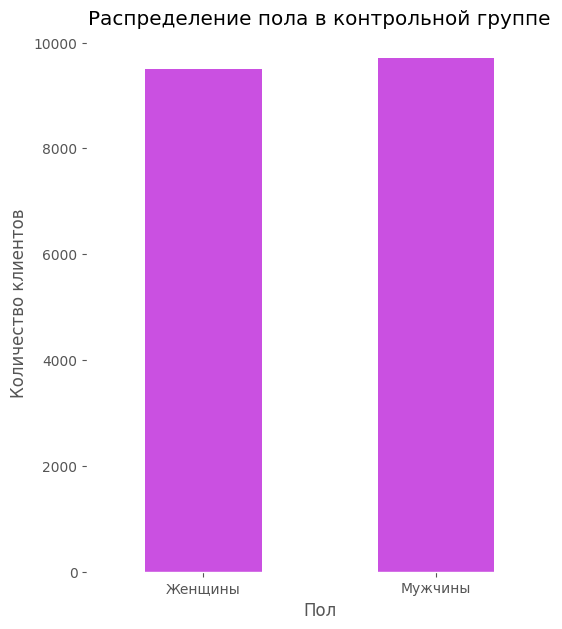

In [10]:
df.loc[(df["A"] == 0) & (df["B"] == 0), "Gender"].value_counts()[::-1].plot(
    kind="bar",
    grid=False,
    title="Распределение пола в контрольной группе",
    figsize=(6, 7),
    xlabel="Пол",
    ylabel="Количество клиентов",
    color="#CA50E1"
)
plt.xticks([0, 1], ["Женщины", "Мужчины"], rotation=0)
plt.show()

### **4.2 Распределение возрастов**

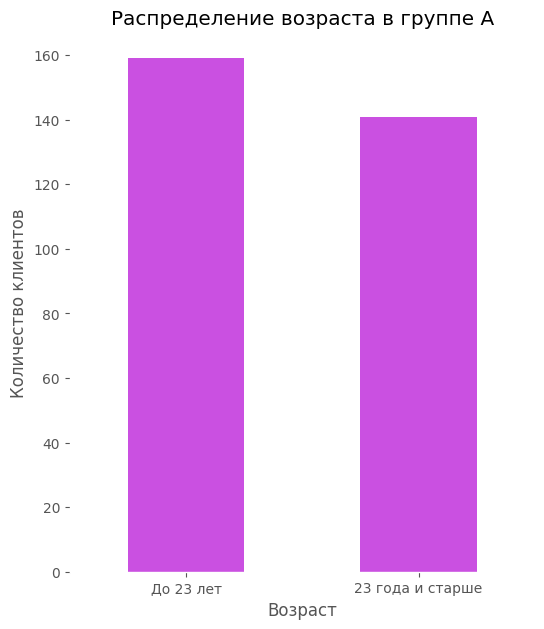

In [11]:
df.loc[df["A"] == 1, "Age"].map(lambda x: x < 23).value_counts().plot(
    kind="bar",
    grid=False,
    title="Распределение возраста в группе A",
    figsize=(6, 7),
    xlabel="Возраст",
    ylabel="Количество клиентов",
    color="#CA50E1"
)
plt.xticks([0, 1], ["До 23 лет", "23 года и старше"], rotation=0)
plt.show()

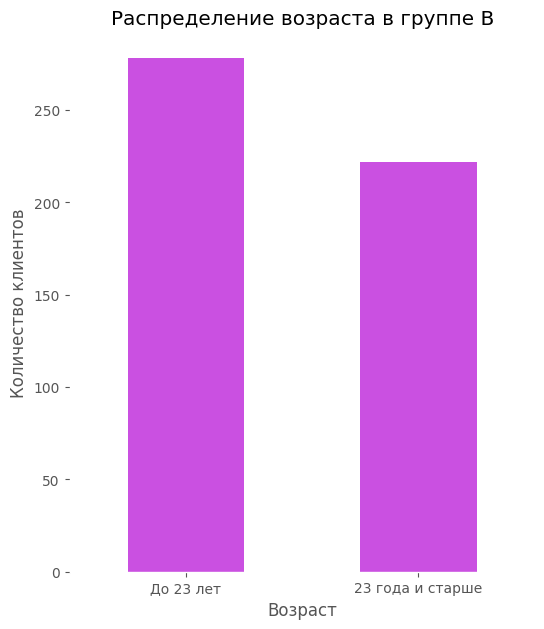

In [12]:
df.loc[df["B"] == 1, "Age"].map(lambda x: x < 23).value_counts().plot(
    kind="bar",
    grid=False,
    title="Распределение возраста в группе B",
    figsize=(6, 7),
    xlabel="Возраст",
    ylabel="Количество клиентов",
    color="#CA50E1"
)
plt.xticks([0, 1], ["До 23 лет", "23 года и старше"], rotation=0)
plt.show()

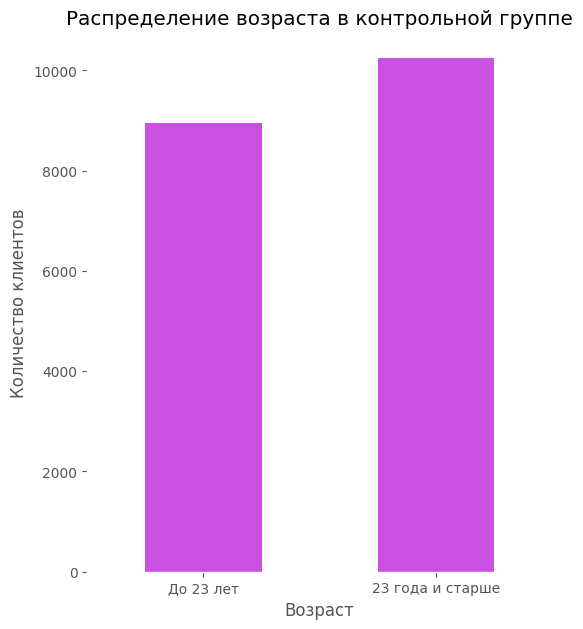

In [13]:
df.loc[(df["A"] == 0) & (df["B"] == 0), "Age"].map(lambda x: x < 23).value_counts()[::-1].plot(
    kind="bar",
    grid=False,
    title="Распределение возраста в контрольной группе",
    figsize=(6, 7),
    xlabel="Возраст",
    ylabel="Количество клиентов",
    color="#CA50E1"
)
plt.xticks([0, 1], ["До 23 лет", "23 года и старше"], rotation=0)
plt.show()

### **4.3 Распределение по давности**

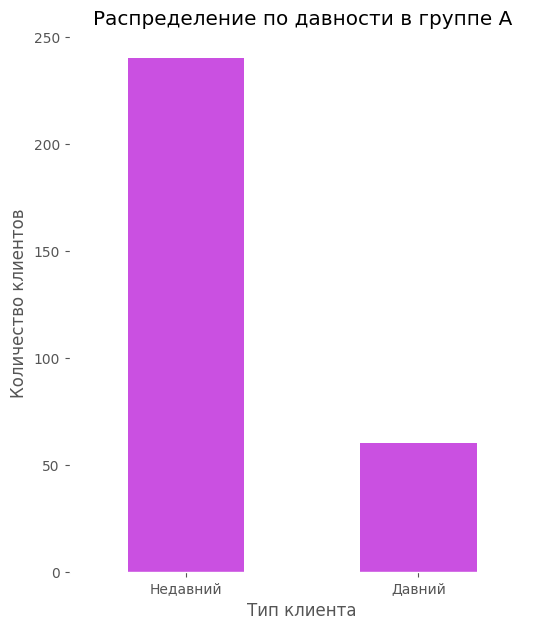

In [14]:
df.loc[df["A"] == 1, "ClientSince"].map(lambda x: x < 2024).value_counts().plot(
    kind="bar",
    grid=False,
    title="Распределение по давности в группе A",
    figsize=(6, 7),
    xlabel="Тип клиента",
    ylabel="Количество клиентов",
    color="#CA50E1"
)
plt.xticks([0, 1], ["Недавний", "Давний"], rotation=0)
plt.show()

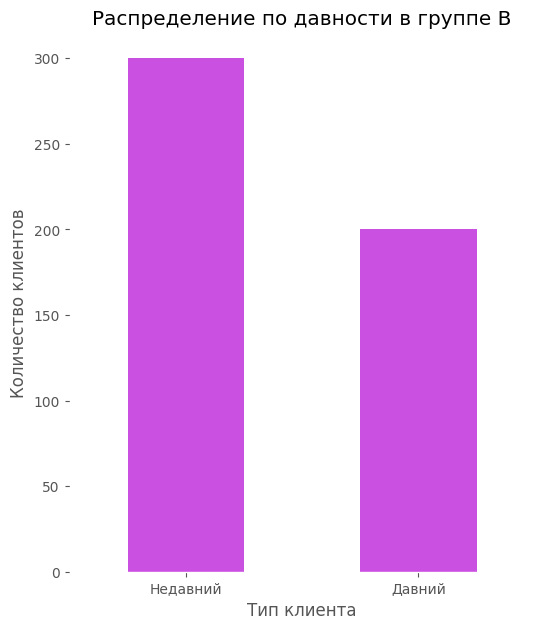

In [15]:
df.loc[df["B"] == 1, "ClientSince"].map(lambda x: x < 2024).value_counts().plot(
    kind="bar",
    grid=False,
    title="Распределение по давности в группе B",
    figsize=(6, 7),
    xlabel="Тип клиента",
    ylabel="Количество клиентов",
    color="#CA50E1"
)
plt.xticks([0, 1], ["Недавний", "Давний"], rotation=0)
plt.show()

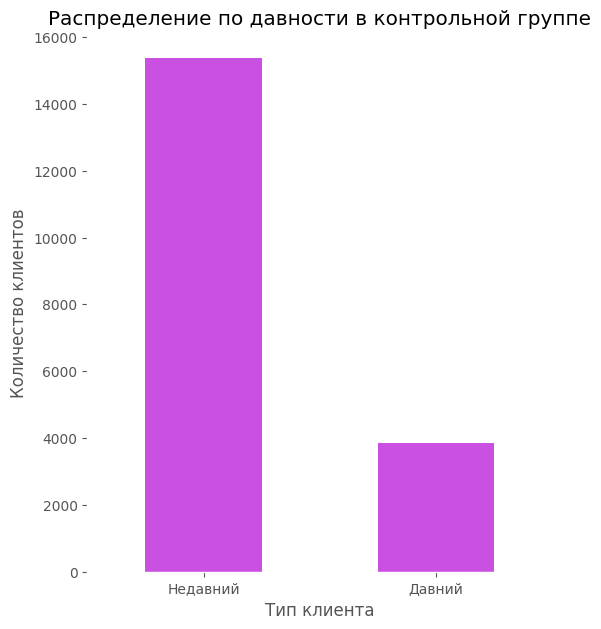

In [16]:
df.loc[(df["A"] == 0) & (df["B"] == 0), "ClientSince"].map(lambda x: x < 2024).value_counts().plot(
    kind="bar",
    grid=False,
    title="Распределение по давности в контрольной группе",
    figsize=(6, 7),
    xlabel="Тип клиента",
    ylabel="Количество клиентов",
    color="#CA50E1"
)
plt.xticks([0, 1], ["Недавний", "Давний"], rotation=0)
plt.show()

## **5 Пересчет конверсии РК и контрольной группы**

In [17]:
df_old = df[df["ClientSince"] < 2024].copy()

a_amount = df_old[df_old["A"] == 1].shape[0]
a_bought = df_old[(df_old["Purchased"] == 1) & (df_old["A"] == 1)].shape[0]
a_conversion = a_bought / a_amount

b_amount = df_old[df_old["B"] == 1].shape[0]
b_bought = df_old[(df_old["Purchased"] == 1) & (df_old["B"] == 1)].shape[0]
b_conversion = b_bought / b_amount

control_amount = df_old[(df_old["A"] == 0) & (df_old["B"] == 0)].shape[0]
control_bought = df_old[(df_old["Purchased"] == 1) & (df_old["A"] == 0) & (df_old["B"] == 0)].shape[0]
control_conversion = control_bought / control_amount

print(
    f"Конверсия РК: A - {a_conversion * 100:.2f}%, B - {b_conversion * 100:.2f}%, естественная - {control_conversion * 100:.2f}%")

Конверсия РК: A - 20.00%, B - 20.00%, естественная - 20.00%


In [18]:
df_new = df[df["ClientSince"] >= 2024]

a_amount = df_new[df_new["A"] == 1].shape[0]
a_bought = df_new[(df_new["Purchased"] == 1) & (df_new["A"] == 1)].shape[0]
a_conversion = a_bought / a_amount

b_amount = df_new[df_new["B"] == 1].shape[0]
b_bought = df_new[(df_new["Purchased"] == 1) & (df_new["B"] == 1)].shape[0]
b_conversion = b_bought / b_amount

control_amount = df_new[(df_new["A"] == 0) & (df_new["B"] == 0)].shape[0]
control_bought = df_new[(df_new["Purchased"] == 1) & (df_new["A"] == 0) & (df_new["B"] == 0)].shape[0]
control_conversion = control_bought / control_amount

print(
    f"Конверсия РК: A - {a_conversion * 100:.2f}%, B - {b_conversion * 100:.2f}%, естественная - {control_conversion * 100:.2f}%")

Конверсия РК: A - 8.75%, B - 3.00%, естественная - 2.99%


## **6 Конверсия среди разных типов, разных возрастов, разных полов**

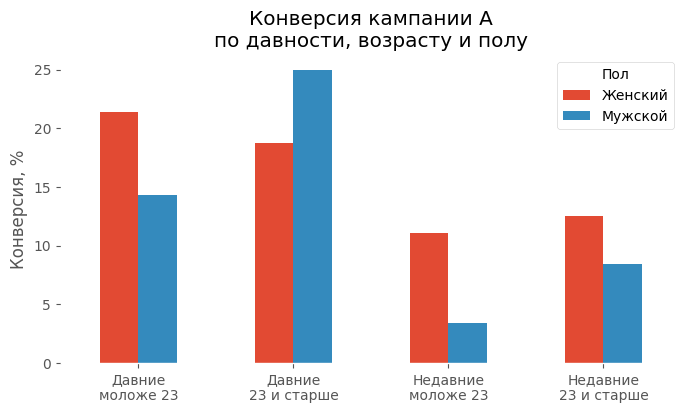

Gender                   Female       Male
is_old   age_group                        
Давние   моложе 23    21.428571  14.285714
         23 и старше  18.750000  25.000000
Недавние моложе 23    11.111111   3.389831
         23 и старше  12.500000   8.450704

In [19]:
df_a = df[df["A"] == 1].copy()
df_a["is_old"] = np.where(df_a["ClientSince"] < 2024, "Давние", "Недавние")
df_a["age_group"] = np.where(df_a["Age"] < 23, "моложе 23", "23 и старше")
df_a["Purchased"] = df_a["Purchased"].astype(int)

agg = df_a.groupby(
    ["is_old", "age_group", "Gender"],
    observed=True
)["Purchased"].agg(size="count", bought="sum")
agg["conversion"] = agg["bought"] / agg["size"] * 100

pivot = agg.pivot_table(
    index=["is_old", "age_group"],
    columns="Gender",
    values="conversion",
    observed=True
)

pivot = pivot.reindex(
    pd.MultiIndex.from_product(
        [["Давние", "Недавние"], ["моложе 23", "23 и старше"]],
        names=["is_old", "age_group"],
    )
)

pivot.plot(
    kind="bar",
    figsize=(8, 4),
    rot=0,
)

plt.title("Конверсия кампании A\nпо давности, возрасту и полу")
plt.ylabel("Конверсия, %")
plt.xlabel("")

plt.xticks(
    ticks=np.arange(len(pivot.index)),
    labels=[f"{io}\n{ag}" for io, ag in pivot.index]
)

handles, labels = plt.gca().get_legend_handles_labels()
labels = ["Мужской" if l == "Male" else "Женский" if l == "Female" else l
          for l in labels]

plt.legend(handles, labels, title="Пол")
plt.grid(False)

plt.show()
pivot

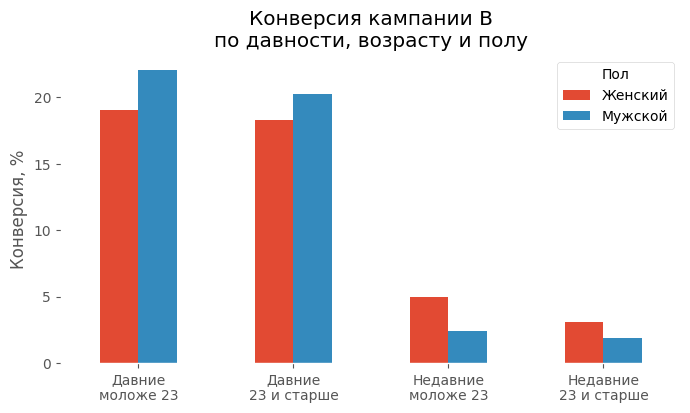

Gender                   Female       Male
is_old   age_group                        
Давние   моложе 23    19.047619  22.077922
         23 и старше  18.309859  20.224719
Недавние моложе 23     5.000000   2.380952
         23 и старше   3.076923   1.886792

In [20]:
df_b = df[df["B"] == 1].copy()
df_b["is_old"] = np.where(df_b["ClientSince"] < 2024, "Давние", "Недавние")
df_b["age_group"] = np.where(df_b["Age"] < 23, "моложе 23", "23 и старше")
df_b["Purchased"] = df_b["Purchased"].astype(int)

agg = df_b.groupby(
    ["is_old", "age_group", "Gender"],
    observed=True
)["Purchased"].agg(size="count", bought="sum")
agg["conversion"] = agg["bought"] / agg["size"] * 100

pivot = agg.pivot_table(
    index=["is_old", "age_group"],
    columns="Gender",
    values="conversion",
    observed=True
)

pivot = pivot.reindex(
    pd.MultiIndex.from_product(
        [["Давние", "Недавние"], ["моложе 23", "23 и старше"]],
        names=["is_old", "age_group"],
    )
)

pivot.plot(
    kind="bar",
    figsize=(8, 4),
    rot=0,
)

plt.title("Конверсия кампании B\nпо давности, возрасту и полу")
plt.ylabel("Конверсия, %")
plt.xlabel("")

plt.xticks(
    ticks=np.arange(len(pivot.index)),
    labels=[f"{io}\n{ag}" for io, ag in pivot.index]
)

handles, labels = plt.gca().get_legend_handles_labels()
labels = ["Мужской" if l == "Male" else "Женский" if l == "Female" else l
          for l in labels]

plt.legend(handles, labels, title="Пол")
plt.grid(False)

plt.show()
pivot

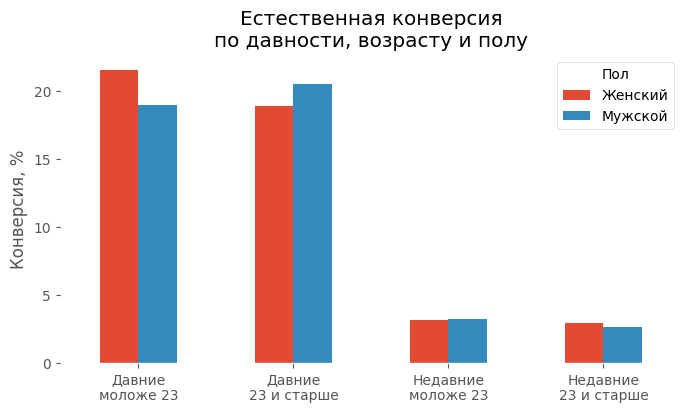

Gender                   Female       Male
is_old   age_group                        
Давние   моложе 23    21.590909  18.961625
         23 и старше  18.946302  20.515179
Недавние моложе 23     3.195963   3.253377
         23 и старше   2.951303   2.634146

In [21]:
df_c = df[(df["A"] == 0) & (df["B"] == 0)].copy()
df_c["is_old"] = np.where(df_c["ClientSince"] < 2024, "Давние", "Недавние")
df_c["age_group"] = np.where(df_c["Age"] < 23, "моложе 23", "23 и старше")
df_c["Purchased"] = df_c["Purchased"].astype(int)

agg = df_c.groupby(
    ["is_old", "age_group", "Gender"],
    observed=True
)["Purchased"].agg(size="count", bought="sum")
agg["conversion"] = agg["bought"] / agg["size"] * 100

pivot = agg.pivot_table(
    index=["is_old", "age_group"],
    columns="Gender",
    values="conversion",
    observed=True
)

pivot = pivot.reindex(
    pd.MultiIndex.from_product(
        [["Давние", "Недавние"], ["моложе 23", "23 и старше"]],
        names=["is_old", "age_group"],
    )
)

pivot.plot(
    kind="bar",
    figsize=(8, 4),
    rot=0,
)

plt.title("Естественная конверсия\nпо давности, возрасту и полу")
plt.ylabel("Конверсия, %")
plt.xlabel("")

plt.xticks(
    ticks=np.arange(len(pivot.index)),
    labels=[f"{io}\n{ag}" for io, ag in pivot.index]
)

handles, labels = plt.gca().get_legend_handles_labels()
labels = ["Мужской" if l == "Male" else "Женский" if l == "Female" else l
          for l in labels]

plt.legend(handles, labels, title="Пол")
plt.grid(False)

plt.show()
pivot

## **7 Пересчет прибыли**

In [29]:
df["is_old"] = np.where(df["ClientSince"] < 2024, "Давние", "Недавние")
df["age_group"] = np.where(df["Age"] < 23, "моложе 23", "23 и старше")
df["Purchased"] = df["Purchased"].astype(int)

### **7.1 Для группы А**

In [30]:
control = df[(df["A"] == 0) & (df["B"] == 0)].copy()
conv_control = control.groupby(
    ["is_old", "age_group", "Gender"],
    observed=True
)["Purchased"].agg(
    N_control="count",
    bought_control="sum"
).reset_index()
conv_control["C"] = conv_control["bought_control"] / conv_control["N_control"]

rk_a = df[df["A"] == 1].copy()
conv_a = rk_a.groupby(
    ["is_old", "age_group", "Gender"],
    observed=True
)["Purchased"].agg(
    N="count",
    bought="sum"
).reset_index()
conv_a["P"] = conv_a["bought"] / conv_a["N"]

summary = conv_a.merge(
    conv_control[["is_old", "age_group", "Gender", "C", "N_control"]],
    on=["is_old", "age_group", "Gender"],
    how="left"
)

avg_revenue = 3000
cost_per_contact = 80

summary["uplift"] = summary["P"] - summary["C"]
summary["extra_purchases"] = summary["N_control"] * summary["uplift"]
summary["extra_purchases"] = summary["extra_purchases"].map(lambda x: x if x > 0 else 0)
summary["revenue_extra"] = summary["extra_purchases"] * avg_revenue
summary["ad_cost"] = summary["N_control"] * cost_per_contact
summary["profit"] = summary["revenue_extra"] - summary["ad_cost"]

summary[[
    "is_old", "age_group", "Gender",
    "extra_purchases", "revenue_extra", "ad_cost", "profit"
]]

,is_old,age_group,Gender,extra_purchases,revenue_extra,ad_cost,profit
0,Давние,23 и старше,Female,0.000000,0.000000e+00,78960,-78960.000000
1,Давние,23 и старше,Male,48.750000,1.462500e+05,86960,59290.000000
2,Давние,моложе 23,Female,0.000000,0.000000e+00,70400,-70400.000000
3,Давние,моложе 23,Male,0.000000,0.000000e+00,70880,-70880.000000
4,Недавние,23 и старше,Female,388.250000,1.164750e+06,325280,839470.000000
5,Недавние,23 и старше,Male,238.478873,7.154366e+05,328000,387436.619718
6,Недавние,моложе 23,Female,282.333333,8.470000e+05,285360,561640.000000
7,Недавние,моложе 23,Male,4.949153,1.484746e+04,290160,-275312.542373


_Отрицательной покупке в данном контексте быть не может, поэтому мы приняли такие значения за нуль._

### **7.2 Для группы B**

In [31]:
control = df[(df["A"] == 0) & (df["B"] == 0)].copy()
conv_control = control.groupby(
    ["is_old", "age_group", "Gender"],
    observed=True
)["Purchased"].agg(
    N_control="count",
    bought_control="sum"
).reset_index()
conv_control["C"] = conv_control["bought_control"] / conv_control["N_control"]

rk_b = df[df["B"] == 1].copy()
conv_b = rk_b.groupby(
    ["is_old", "age_group", "Gender"],
    observed=True
)["Purchased"].agg(
    N="count",
    bought="sum"
).reset_index()
conv_b["P"] = conv_b["bought"] / conv_b["N"]

summary = conv_b.merge(
    conv_control[["is_old", "age_group", "Gender", "C", "N_control"]],
    on=["is_old", "age_group", "Gender"],
    how="left"
)

avg_revenue = 3000
cost_per_contact = 80

summary["uplift"] = summary["P"] - summary["C"]
summary["extra_purchases"] = summary["N_control"] * summary["uplift"]
summary["extra_purchases"] = summary["extra_purchases"].map(lambda x: x if x > 0 else 0)
summary["revenue_extra"] = summary["extra_purchases"] * avg_revenue
summary["ad_cost"] = summary["N_control"] * cost_per_contact
summary["profit"] = summary["revenue_extra"] - summary["ad_cost"]

summary[[
    "is_old", "age_group", "Gender",
    "extra_purchases", "revenue_extra", "ad_cost", "profit"
]]

,is_old,age_group,Gender,extra_purchases,revenue_extra,ad_cost,profit
0,Давние,23 и старше,Female,0.000000,0.000000,78960,-78960.000000
1,Давние,23 и старше,Male,0.000000,0.000000,86960,-86960.000000
2,Давние,моложе 23,Female,0.000000,0.000000,70400,-70400.000000
3,Давние,моложе 23,Male,27.610390,82831.168831,70880,11951.168831
4,Недавние,23 и старше,Female,5.107692,15323.076923,325280,-309956.923077
5,Недавние,23 и старше,Male,0.000000,0.000000,328000,-328000.000000
6,Недавние,моложе 23,Female,64.350000,193050.000000,285360,-92310.000000
7,Недавние,моложе 23,Male,0.000000,0.000000,290160,-290160.000000
